In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import statsmodels.api as sm

Задача 1:

 1. Сгенерируйте список из 1000 случайных чисел в диапазоне от 1 до 6, имитируя броски игральной кости.

 2. Используйте plt.hist для визуализации распределения чисел.

 3. Настройте параметры bins, rwidth, и density, чтобы гистограмма корректно отображала равномерное распределение.

 4. Добавьте подписи к осям и заголовок гистограммы.

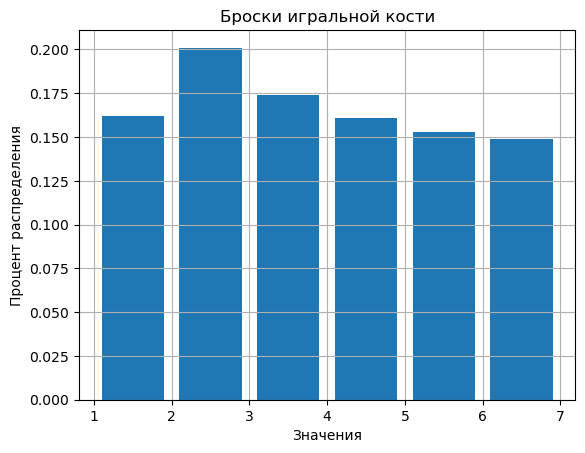

In [27]:
data1 = np.random.randint(1,7,1000)

plt.hist(data1,bins=np.arange(1,8,1),rwidth=0.8,density=True)
plt.title('Броски игральной кости')
plt.xlabel('Значения')
plt.ylabel('Процент распределения')
plt.grid()
plt.show()

Задача 2: Исследовать, как выбросы влияют на характеристики нормального распределения (среднее значение и стандартное отклонение), и визуализировать эффект выбросов на гистограмме распределения.

 1. Используйте np.random.seed() для установки начального значения генератора случайных чисел для воспроизводимости результатов.

 2. Сгенерируйте выборку из 10000 значений, следующих нормальному распределению с заданным средним (например, 50) и стандартным отклонением (например, 15), используя np.random.normal().

 3. Добавьте к этой выборке несколько выбросов — значений, сильно отличающихся от остальных (например, 10 значений в районе 200).

 4. Рассчитайте новые среднее значение и стандартное отклонение для модифицированной выборки.

 5. Визуализируйте модифицированное распределение с помощью plt.hist(), отметьте новое среднее значение и стандартные отклонения, как в предыдущем примере.

 6. Сравните графики и числовые характеристики исходного и модифицированного распределений, чтобы обсудить влияние выбросов на распределение.

Среднее значение: 50.21811976970415
Стандартное отклонение: 15.189467448546893
Новое среднее значение: 50.36775201768647
Новое стандартное отклонение: 15.902177258940602


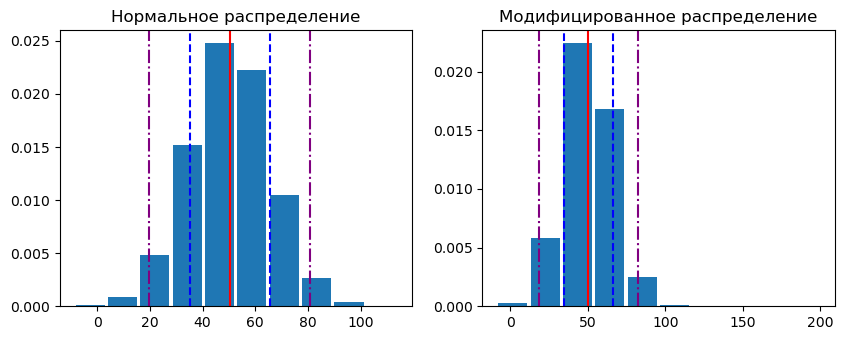

In [66]:
np.random.seed(101)
data2 = np.random.normal(50,15,10000)
data3 = data2.tolist()
for _ in range(10):
    data3.append(200)  
    
mean3, std3 = np.mean(data3), np.std(data3)
mean2, std2 = np.mean(data2), np.std(data2)

print(f"Среднее значение: {mean2}\nСтандартное отклонение: {std2}")
print(f"Новое среднее значение: {mean3}\nНовое стандартное отклонение: {std3}")


fig, axs = plt.subplots(1,2,figsize=(10,4))
fig.subplots_adjust(top=0.8)

axs[0].hist(data2, rwidth=0.9,density=True)
axs[0].axvline(mean2,linestyle='-',color='red',label='mean')
axs[0].axvline(mean2-std2,linestyle='--',color='blue',label='+-1std')
axs[0].axvline(mean2+std2,linestyle='--',color='blue')
axs[0].axvline(mean2+std2*2,linestyle='-.',color='purple',label='+-2std')
axs[0].axvline(mean2-std2*2,linestyle='-.',color='purple')
axs[0].set_title('Нормальное распределение')

axs[1].hist(data3, rwidth=0.9,density=True)
axs[1].axvline(mean3,linestyle='-',color='red',label='mean')
axs[1].axvline(mean3-std3,linestyle='--',color='blue',label='+-1std')
axs[1].axvline(mean3+std3,linestyle='--',color='blue')
axs[1].axvline(mean3+std3*2,linestyle='-.',color='purple',label='+-2std')
axs[1].axvline(mean3-std3*2,linestyle='-.',color='purple')
axs[1].set_title('Модифицированное распределение')
plt.show()

Задача 3: Используйте KDE для анализа и сравнения распределения доходов жителей двух разных городов.

 1. Сгенерируйте две выборки данных, представляющие собой доходы жителей двух городов: CityA и CityB. Для CityA используйте нормальное распределение с параметрами среднего дохода 50000 и стандартного отклонения 15000. Для CityB используйте нормальное распределение с параметрами среднего дохода 55000 и стандартного отклонения 20000. В каждой выборке должно быть по 1000 значений.

 2. Визуализируйте распределения доходов для каждого города с помощью sns.kdeplot, отобразив оба распределения на одном графике для наглядного сравнения.

 3. Добавьте на график вертикальные линии, указывающие средний доход для каждого города.

 4. Добавьте заголовок, подписи к осям, а также легенду, чтобы указать, какой цвет соответствует каждому городу.

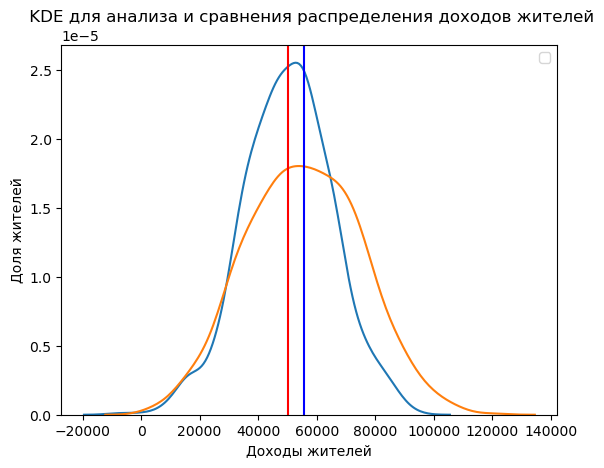

In [79]:
CityA = np.random.normal(50000,15000,1000)
CityB = np.random.normal(55000,20000,1000)

sns.kdeplot(CityA)
sns.kdeplot(CityB)
plt.axvline(CityA.mean(),linestyle='-',color='r',label='CityA mean')
plt.axvline(CityB.mean(),linestyle='-',color='b',label='CityB mean')
plt.title(' KDE для анализа и сравнения распределения доходов жителей')
plt.xlabel('Доходы жителей')
plt.ylabel('Доля жителей')
plt.legend('')
plt.show()

Задача 4: Изучить распределение времени, необходимого для обслуживания клиентов в кафе, и проверить это распределение на "нормальность".

 1. Сгенерируйте генеральную совокупность времени обслуживания клиентов, используя экспоненциальное распределение с параметром scale=10 и размером 1000 с помощью np.random.exponential.

 2. Из этой генеральной совокупности извлеките случайную выборку из 100 значений без замены.

 3. Визуализируйте распределение выборки с помощью sns.kdeplot и plt.hist, настроив параметры для корректного отображения гистограммы.

 4. Используйте Q-Q plot (sm.qqplot) для проверки выборки на "нормальность", используя line='r' для сравнения с нормальным распределением.



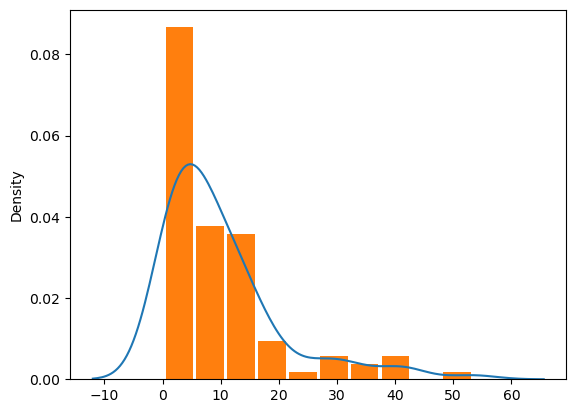

In [83]:
edata = np.random.exponential(10,1000)
sample = np.random.choice(edata,100,True)
sns.kdeplot(sample)
plt.hist(sample,rwidth=0.9,density=True)
plt.show()

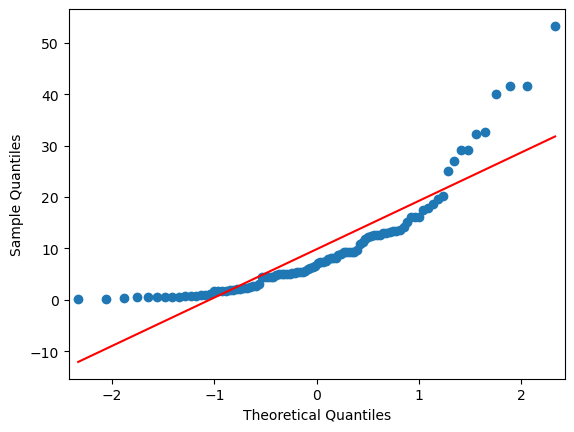

In [84]:
sm.qqplot(sample,line='r')
plt.show()